# Spherical clustering

Spherical clustering, also known as spherical k-means clustering, is a variant of the traditional k-means clustering algorithm. In traditional k-means clustering, data points are partitioned into clusters based on their proximity to the centroid of the cluster, and the objective is to minimize the sum of squared distances between data points and their respective cluster centroids. However, traditional k-means is not well-suited for data that is distributed in a spherical or hyperspherical manner.

Spherical clustering, on the other hand, is designed for data that is naturally distributed on the surface of a hypersphere. This often occurs when dealing with high-dimensional data or data that has been normalized. In spherical clustering, the objective is to partition data into clusters such that the sum of squared distances between data points and their respective cluster centroids is minimized, while also ensuring that the cluster centroids lie on the hypersphere.

Here are the key steps in spherical clustering:

1. Initialize cluster centroids: Select initial cluster centroids, typically by randomly choosing data points from the dataset.

2. Assign data points to clusters: Assign each data point to the cluster whose centroid is closest to the data point on the hypersphere.

3. Update cluster centroids: Recalculate the cluster centroids as the mean of the data points in each cluster, ensuring that the new centroids also lie on the hypersphere.

4. Repeat steps 2 and 3 until convergence: Iterate the assignment and update steps until the algorithm converges, typically when there is little or no change in the cluster assignments or centroids.

Spherical clustering is often used in text analysis, image processing, and any application where the data can be naturally represented on the surface of a hypersphere. It is a variation of k-means clustering that takes into account the spherical nature of the data distribution, and it can lead to more meaningful and interpretable clusters for such data.

Spherical clustering has practical applications in various fields where data exhibits a spherical or hyperspherical distribution. Here are some practical use cases for spherical clustering:

1. Document Clustering:
   - Text documents can be represented as high-dimensional vectors in a hyperspace (e.g., using TF-IDF or word embeddings). Spherical clustering can be used to group similar documents, such as news articles or customer reviews, into clusters where the clusters represent topics or themes.

2. Image Clustering:
   - Image feature vectors extracted from images using techniques like CNNs (Convolutional Neural Networks) often reside in a high-dimensional space. Spherical clustering can help group visually similar images into clusters, which can be useful in image retrieval or content organization.

3. Anomaly Detection:
   - In applications where most data points are expected to conform to a normal behavior pattern and anomalies are rare, spherical clustering can help identify outliers or anomalies that fall far from the main cluster on the hypersphere.

4. Recommendation Systems:
   - Spherical clustering can be used in recommendation systems to group users or items with similar preferences. For example, in a music recommendation system, users with similar music tastes can be clustered together based on their listening history.

5. Genomic Data Analysis:
   - Spherical clustering is used in genomics to group genes or proteins with similar expression profiles. These profiles can be represented as high-dimensional vectors, and spherical clustering helps identify genes or proteins with similar functions.

6. Network Anomaly Detection:
   - In network security, spherical clustering can be applied to network traffic data to identify unusual or potentially malicious patterns of behavior by clustering network flows based on their features.

7. Customer Segmentation:
   - Spherical clustering can be used for customer segmentation in e-commerce and marketing. It can help identify groups of customers with similar preferences, behavior, or demographics, allowing businesses to tailor marketing strategies and recommendations.

8. Natural Language Processing (NLP):
   - Spherical clustering is used in NLP for applications such as topic modeling, where it can group related words or documents together based on their semantic similarity.

9. Sensor Data Analysis:
   - In IoT (Internet of Things) and sensor data analysis, spherical clustering can be employed to group sensors with similar readings or behaviors, helping detect and respond to anomalies or equipment failures.

Spherical clustering is particularly useful when dealing with data that is inherently distributed on the surface of a hypersphere, and it helps uncover meaningful patterns and relationships in the data. It allows for more accurate and interpretable cluster assignments, making it a valuable tool in various data analysis and machine learning tasks.

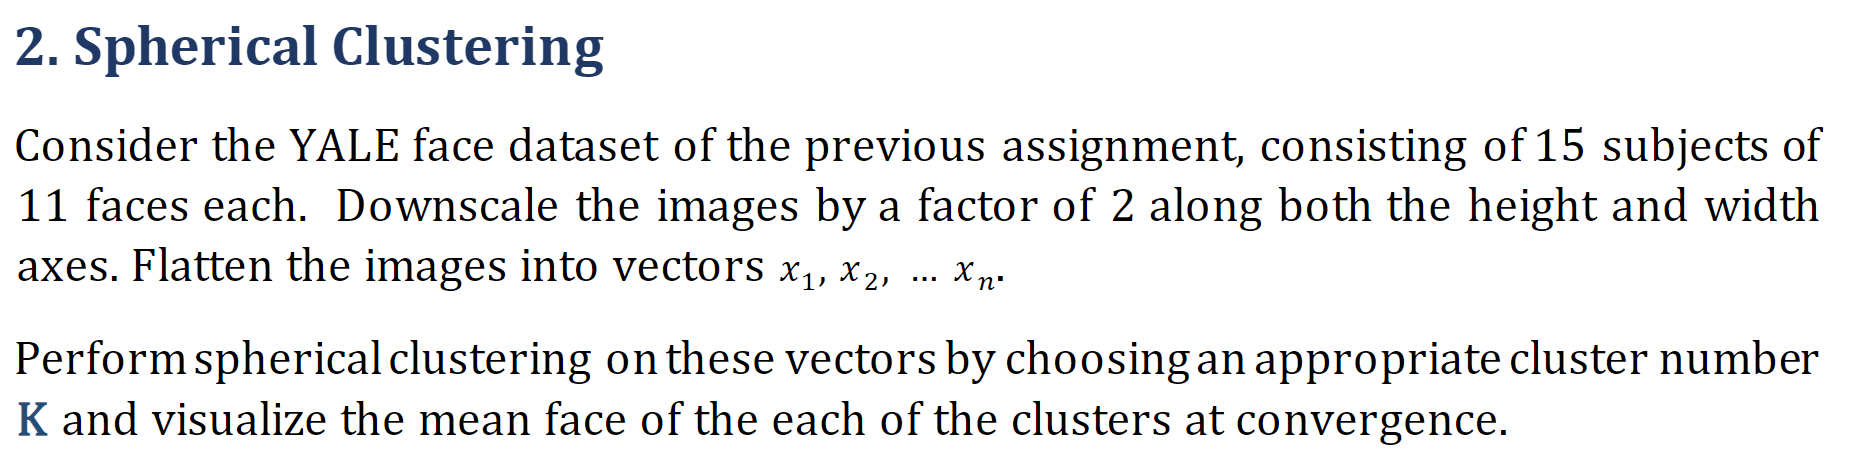

In [1]:
# !unzip /content/YALE.zip
!pip install opencv-python

In [2]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  numpy.linalg as la
#from google.colab.patches import cv2_imshow

In [3]:
def load_images_from_folder(folder):
    images = []
    data = []
    count = 1
    list_images = sorted(os.listdir(folder))
    for filename in list_images:
        img = cv2.imread(os.path.join(folder,filename))
        #print(img.shape)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)
        #print(img.shape)
        #img = 0.75*np.power(img,1.1)

        scale_percent = 50
        #calculate the 50 percent of original dimensions
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)

        # dsize
        dsize = (width, height)

        # resize image
        img = cv2.resize(img, dsize)
        data.append(img.reshape(-1))
        #cv2_imshow(img)
        #print(filename)
        count+=1
    images = np.array(images)
    data = np.array(data)
    return images,data

In [4]:
def Spherical_K_Means(K,data,tol):
    labels = np.random.choice(np.arange(K),len(data),replace=True)
    #print(len(labels))
    all_unique_labels = np.unique(labels,return_counts = True)
    #print(all_unique_labels)

    if len(all_unique_labels[0]) != K:
        print("All unique labels not present.")
        return

    mean = []
    for i in range(K):
        mean.append(np.mean(data[np.argwhere(labels == i)],axis=0).reshape(-1))

    mean = np.array(mean)
    #print(mean.shape)
    lenght = la.norm(mean,axis = 1)
    #print(lenght)
    for i,mean_vector in enumerate(mean):
        mean[i] = mean_vector/lenght[i]
    #lenght = la.norm(mean,axis = 1)
    #print(lenght)
    pre_mean = np.zeros(shape = mean.shape)
    # print(mean)
    # print("\n\n")
    # print(np.sum(mean*pre_mean,axis = 1))

    while min(np.sum(mean*pre_mean,axis = 1)) < (1-tol):
        pre_mean = np.copy(mean)

        # Update the labels of each datapoint
        for i in range(len(data)):
            #print(np.argmax(np.sum(data[i]*pre_mean,axis = 1)))
            labels[i] = np.argmax(np.sum(data[i]*pre_mean,axis = 1))

        mean = []
        # Centroid Re-estimation for each cluster
        for i in range(K):
            mean.append(np.mean(data[np.argwhere(labels == i)],axis=0).reshape(-1))
        mean = np.array(mean)

        #print(mean.shape)
        lenght = la.norm(mean,axis = 1)

        # Normalizing the mean vectors
        for i,mean_vector in enumerate(mean):
            mean[i] = mean_vector/lenght[i]

        print(min(np.sum(mean*pre_mean,axis = 1)))
    return mean,labels

In [5]:
images,data = load_images_from_folder('YALE')
print("Data shape : ",data.shape)
print("Image shape : ",images.shape)


Data shape :  (165, 11155)
Image shape :  (165, 231, 195)


In [6]:
lengths = la.norm(data,axis = 1)
data = data.astype(float)
for i in range(len(data)):
    data[i] = data[i]/lengths[i]

In [7]:
means,labels = Spherical_K_Means(20,data,10**-3)
print(means.shape)

0.8677833806553219
0.9613795408579907
0.9940222538423102
0.993044901984044
0.9969882110199892
0.9961910894119065
0.9973761947449109
0.9985183760013581
0.9999999999999998
(20, 11155)


In [8]:
labels = np.array(labels)
print(np.unique(labels,return_counts=True))
#print(images.shape)
for i in range(20):
    indices = np.argwhere(labels == i).astype(int)
    #print(indices)
    mean = np.zeros(shape = images[0].shape)
    for index in indices:
        mean = images[index[0]]+mean
    cv2.imshow('image',mean/len(indices))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([17,  8, 12, 10,  4,  7,  1,  6, 10, 10,  4,  9,  4, 10, 13,  5,  9,
        6, 13,  7], dtype=int64))
